# Introduction to Computational Science

## Introductory Lab Assignment

This assignment aims to demonstrate the basic use of Python within Jupyter Notebook, while providing first insights in data analysis and modelling tasks related to infectious diseases.

The goals defined in the assignment are:
- find data related to an infectious disease;
- download the data;
- read it in with Python;
- analyze the data;
- plot results from the analysis.

### Finding the data

As suggested in the assignment brief, the databases of the World Healthcare Organization were searched for relevant data collections. One that appeared interesting and relevant for the problems investigated in the course was the the data collection of FluNet, established within the Global Influenza Programme for collecting reported infection data for Type A and Type B Influenza (https://www.who.int/tools/flunet).

### Downloading the data

The data was downloaded as .CSV and saved in a subfolder named "data" under the cloned GitHub repository of this assignment. This included:
- the dataset itself (VIW_FNT.csv)
- a data dictionary / metadata related to the dataset (VIW_FLU_METADATA.csv)

### Reading the data with Python

The following is a demonstration of the code used to complete the assignment.

First `pandas` is imported as a library of choice for handling the tabular data. Additionally, `pyplot` is imported as a tool to graphically visualize data.

The FluNet data is read using the library's `read_csv` function and stored in the `flunet` variable. Additionally to that, the dictionary from the second .csv file is stored in the `flunet_meta` variable.

In [60]:
import pandas as pd
import matplotlib.pyplot as plt

flunet = pd.read_csv("data/VIW_FNT.csv")
flunet_meta = pd.read_csv("data/VIW_FLU_METADATA.csv")

Evaluating the `flunet` variable gives us a first glimpse into the structure of the data:

In [15]:
flunet

,WHOREGION,FLUSEASON,HEMISPHERE,ITZ,COUNTRY_CODE,COUNTRY_AREA_TERRITORY,ISO_WEEKSTARTDATE,ISO_YEAR,ISO_WEEK,MMWR_WEEKSTARTDATE,...,PARAINFLUENZA,RHINO,RSV,OTHERRESPVIRUS,OTHER_RESPVIRUS_DETAILS,LAB_RESULT_COMMENT,WCR_COMMENT,ISO2,ISOYW,MMWRYW
0,WPR,YR,NH,FLU_SE_ASIA,PHL,Philippines,2016-05-30,2016,22,2016-05-29,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PH,201622,201622
1,EMR,YR,NH,FLU_WST_ASIA,LBN,Lebanon,2022-02-07,2022,6,2022-02-06,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,LB,202206,202206
2,AMR,YR,NH,FLU_CNT_AMC,PAN,Panama,2007-12-03,2007,49,2007-12-02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PA,200749,200749
3,WPR,SH,SH,FLU_OCE_MEL_POL,AUS,Australia,2009-07-20,2009,30,2009-07-19,...,NaN,NaN,NaN,NaN,"PIV-2,3; RSV",NaN,NaN,AU,200930,200930
4,AMR,YR,SH,FLU_TRP_SAMR,ECU,Ecuador,2021-05-10,2021,19,2021-05-09,...,1.0,NaN,4.0,NaN,NaN,NaN,NaN,EC,202119,202119
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146547,AFR,YR,NH,FLU_WST_AFR,GHA,Ghana,2011-05-16,2011,20,2011-05-15,...,NaN,NaN,NaN,NaN,NaN,NaN,1. Sentinel sites are mandated to submit to NI...,GH,201120,201120
146548,EUR,NH,NH,FLU_EST_EUR,BGR,Bulgaria,2021-02-15,2021,7,2021-02-14,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,BG,202107,202107
146549,EUR,NH,NH,FLU_EST_EUR,BGR,Bulgaria,2003-02-24,2003,9,2003-02-23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,BG,200309,200309
146550,WPR,YR,NH,FLU_SE_ASIA,SGP,Singapore,2015-02-09,2015,7,2015-02-08,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SG,201507,201506


This enables us to see the different properties according to which the data is structured. However, the preview does not show all of the 49 columns of the table, so it would be useful to retrieve a list of these so we know what categories of the data we can address.

In [22]:
fn_cols = flunet.columns

These are not very descriptive, so we check the meta-data table to see if it can provide us with more insights:

In [21]:
flunet_meta

,DatasetName,TableName,FieldName,DataType,Description,Comments
0,FluNet,VIW_FNT,WHOREGION,string,"WHO regions (AFR, AMR, EMR, EUR, SEAR, WPR)",see: https://www.who.int/about/structure
1,FluNet,VIW_FNT,FLUSEASON,string,"Reporting season (NH=northern hemisphere, SH=s...",NaN
2,FluNet,VIW_FNT,HEMISPHERE,string,"Hemisphere (NH=northern hemisphere, SH=souther...",NaN
3,FluNet,VIW_FNT,ITZ,string,Influenza transmission zone,see: https://cdn.who.int/media/docs/default-so...
4,FluNet,VIW_FNT,COUNTRY_CODE,string,ISO3 country codes,includes WHO defined codes if not ISO3 code av...
...,...,...,...,...,...,...
84,fluID,VIW_FID_EPI,COMMENTS,string,Comments,NaN
85,fluID,VIW_FID_EPI,ILI_NB_SITES,integer,Number of surveillance reporting sites for ILI...,NaN
86,fluID,VIW_FID_EPI,SARI_NB_SITES,integer,Number of surveillance reporting sites for SAR...,NaN
87,fluID,VIW_FID_EPI,ARI_NB_SITES,integer,Number of surveillance reporting sites for ARI...,NaN


Here we see a detailed description of each category from the first table and can print out only the relevant information by using the matching category name in the `FieldName` category.

In [48]:
#print(flunet_meta[['FieldName','Description']])
for i in range(len(fn_cols)):
    print(flunet_meta.loc[i]["FieldName"] + ":" + flunet_meta.loc[i]["Description"])

WHOREGION:WHO regions (AFR, AMR, EMR, EUR, SEAR, WPR)
FLUSEASON:Reporting season (NH=northern hemisphere, SH=southern hemisphere, YR=year-round reporting)
HEMISPHERE:Hemisphere (NH=northern hemisphere, SH=southern hemisphere)
ITZ:Influenza transmission zone
COUNTRY_CODE:ISO3 country codes
COUNTRY_AREA_TERRITORY:Country, area or territory name
ISO2:ISO2 country code
ISO_WEEKSTARTDATE:Week start date (ISO 8601)
ISO_YEAR:Year  (ISO 8601)
ISO_WEEK:Week  (ISO 8601)
ISOYW:Year and week (ISO8601)
MMWR_WEEKSTARTDATE:Week start date (MMWR)
MMWR_YEAR:Year (MMWR)
MMWR_WEEK:Week (MMWR)
MMWRYW:Year and week (MMWR)
ORIGIN_SOURCE:Surveillance site type (NONSENTINEL/SENTINEL/NOTDEFINED)
SPEC_RECEIVED_NB:Number of specimens received for influenza
SPEC_PROCESSED_NB:Number of specimens processed for influenza with any kind of method
AH1N12009:Number of A(H1N1)pdm09 detections
AH1:Number of A(H1) detections (other than A(H1N1)pdm09)
AH3:Number of A(H3) detections
AH5:Number of A(H5) detections
AH7N9:Numbe

One specific feature of the data that would be interesting to investigate is the overall time-period in which the data has been collected. This is done by taking the minimum and maximum value of the `ISO_YEAR` property.

In [49]:
period_range = [flunet["ISO_YEAR"].min(), flunet["ISO_YEAR"].max()]

print(period_range)

[1995, 2023]


Thus we see that the data reports start back in 1995 and continue up to the current date.

Now we can examine the data in more detail by taking all detections of influenza A and B (disregarding the subtypes). We will store the values in corresponding arrays, sorted by year of detection.

We do that by first gathering the relevant data in a reduced DataFrame - one that contains only the years, influenza A detections and influenza B detections. This DataFrame is then grouped by year, so all the corresponding virus detection numbers can be summed in a for-loop that scans the grouped data year by year from the beginning until the end of the observed period.

We also import the `math` library so we can detect _NaN_ values and disregard them.

In [72]:
import math

flunet_yr_sorted = flunet[["ISO_YEAR","INF_A","INF_B"]][:].sort_values("ISO_YEAR")
flunet_grouped = flunet_yr_sorted.groupby("ISO_YEAR")

infA_detections = []
infB_detections = []

for i in range(period_range[0], period_range[1]):
    year_table = flunet_grouped.get_group(i)
    
    # temporary aggregators of infection detections
    infA_temp = 0
    infB_temp = 0
    
    for j in range(year_table.shape[0]):
        if not math.isnan(year_table.iloc[j]["INF_A"]):
            infA_temp += year_table.iloc[j]["INF_A"]
        if not math.isnan(year_table.iloc[j]["INF_B"]):
            infB_temp += year_table.iloc[j]["INF_B"]
    
    # append aggregated values to arrays
    infA_detections.append(infA_temp)
    infB_detections.append(infB_temp)

We can now plot the development of detected influenza A and B cases using `plotlib`.

<Axes: >

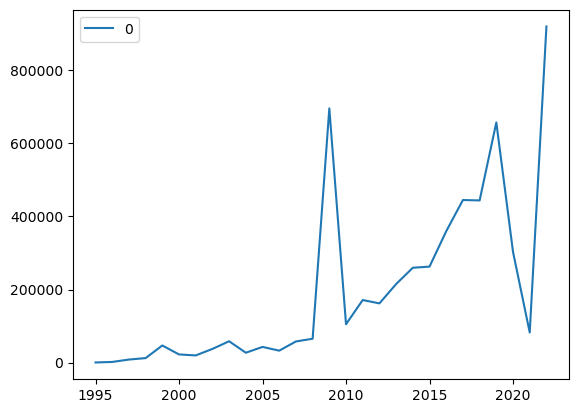

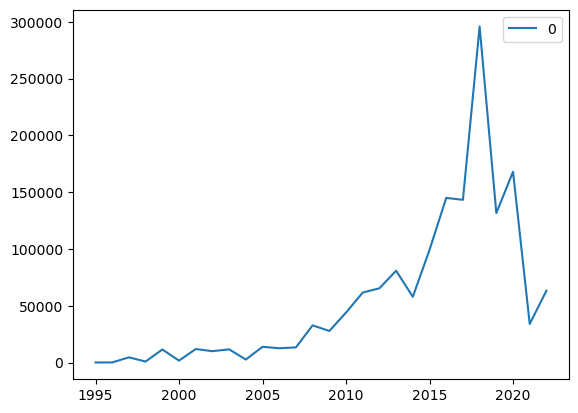

In [81]:
infA_plot = pd.DataFrame(infA_detections, range(period_range[0], period_range[1]))
infB_plot = pd.DataFrame(infB_detections, range(period_range[0], period_range[1]))

infA_plot.plot()
infB_plot.plot()